In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

import zero

from zero.sgd_temporal import MangakiSGDTemporal

In [2]:
ratings_table = pd.read_csv('ratings.csv')

In [3]:
ratings_table

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
ratings_table["userId"] = np.unique(ratings_table["userId"], return_inverse=True)[1]
ratings_table["movieId"] = np.unique(ratings_table["movieId"], return_inverse=True)[1]


In [5]:
ratings_table["mean_of_user"] = ratings_table.groupby('userId')["rating"].transform('mean')
ratings_table["std_of_user"] = ratings_table.groupby('userId')["rating"].transform('std')
ratings_table["scaled_rating"] = (ratings_table["rating"] - ratings_table["mean_of_user"])

In [6]:
users = np.array(ratings_table[['userId']])[:,0]
items =np.array(ratings_table[['movieId']])[:,0]
ratings =np.array(ratings_table[['rating']])[:,0]
timestamps =np.array(ratings_table[['timestamp']])[:,0]
mean_of_user = np.array(ratings_table[['mean_of_user']])[:,0]
std_of_user = np.array(ratings_table[['std_of_user']])[:,0]
scaled_ratings = np.array(ratings_table[['scaled_rating']])[:,0]


In [7]:
nb_users = len(ratings_table.groupby("userId").count())
nb_items = len(ratings_table.groupby("movieId").count())

In [8]:
sgd = MangakiSGDTemporal(nb_users, nb_items)


initialization done
training rmse = 1.3947330506823699
testing rmse = 1.4433133327423002
training rmse = 0.893841235314075
testing rmse = 0.9468807487947154
training rmse = 0.867937685012869
testing rmse = 0.9102949432170914
training rmse = 0.8592898013719059
testing rmse = 0.8982170684586027
training rmse = 0.8544660982485245
testing rmse = 0.8920515688503129
training rmse = 0.8504734243557626
testing rmse = 0.8877977519358828
training rmse = 0.8461974799756358
testing rmse = 0.8840553834972504
training rmse = 0.8410218180843239
testing rmse = 0.8801458944701837
training rmse = 0.8345816601730709
testing rmse = 0.8757332377298109
training rmse = 0.8268092665698298
testing rmse = 0.8707838966284117
training rmse = 0.8179978500118966
testing rmse = 0.8655425803341833
training rmse = 0.8086996074268593
testing rmse = 0.8603893791154822
training rmse = 0.7994681235130113
testing rmse = 0.8556412045676933
training rmse = 0.7906534290719002
testing rmse = 0.8514484479658798
training rmse = 

0.8356297558345043

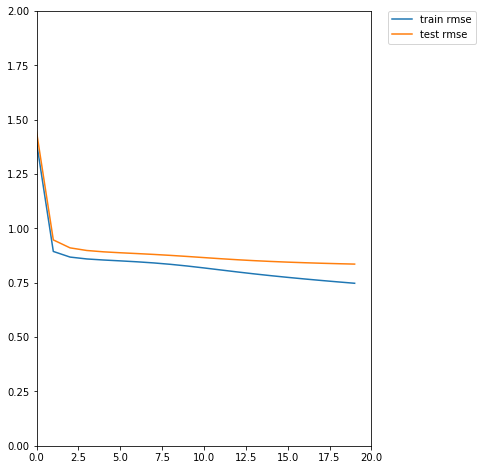

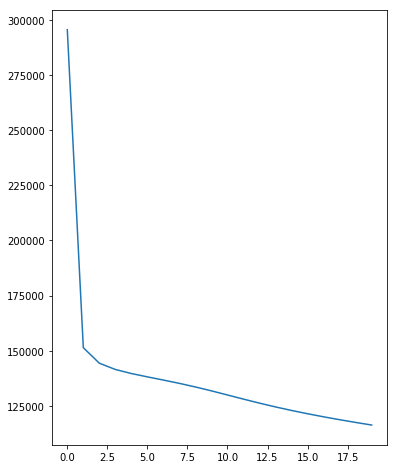

In [9]:
sgd.new_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "no temporal factor")

In [ ]:
sgd.new_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "exponential")

initialization done
0.044392508410658754
training rmse = 0.8359315141220255
testing rmse = 0.8185224905312238
0.046023300348188356
training rmse = 0.8550415437642497
testing rmse = 0.843484244394095
0.047410859382042606
training rmse = 0.8707734682401733
testing rmse = 0.8607176215509228
0.04808890781388563
training rmse = 0.8822365151324634
testing rmse = 0.8727057922725228
0.04836721905939382
training rmse = 0.8907249549401087
testing rmse = 0.8815464852645627
0.0484670217371244
training rmse = 0.8971780183042142
testing rmse = 0.8883909960663645
0.048494890100282115
training rmse = 0.9022075186089284
testing rmse = 0.8938740217910068
0.04849640786362737
training rmse = 0.906213614685982
testing rmse = 0.8983711126701981
0.04848994578877056
training rmse = 0.9094644962591034
testing rmse = 0.9021223684585573
0.04848247869118675
training rmse = 0.9121448293009602
testing rmse = 0.9052917529657265


In [ ]:
#sgd.cl_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "exponential factor")